# 0. 패키지 불러오기 

In [1]:
# 데이터 구성:Series,DataFrame
import pandas as pd

# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib

# export_graphviz : 나무 구조 생성 및 저장 
from sklearn.tree import export_graphviz

# graphviz : 나무 구조 시각화 (dot.확자아 파일 불러오기 등)
import graphviz

# 데이터 분할:train,test
from sklearn.model_selection import train_test_split

# 분류 Random Forest 
from sklearn.ensemble import RandomForestClassifier 

# 최적 모델, 파라미터 탐색 
from sklearn.model_selection import GridSearchCV

# 모델 성능 평가
from sklearn.metrics import confusion_matrix

# 한글 깨짐 방지
import matplotlib.font_manager as fm 
font_list=[font.name for font in fm.fontManager.ttflist]
font_list
plt.rcParams['font.family']='NanumBarunGothic'

# 나무 시각화 페이지

# os환경
import os

# PATH 설정:graphviz 설치된 경로 지정
os.environ['PATH']+=os.pathsep+'C:/Program Files (x86)/Graphviz2.38/bin/'

# 1. 데이터

### 1-1. 데이터 구성하기 

In [2]:
df_raw=pd.read_csv("/home/piai/Desktop/최종/insu_pre_review.csv", engine='python', encoding='EUC-KR')
df_raw.head()

,customer_id,review_cat,judge,review_date,gender,age,height,weight,bust,waist,...,bt_mch_judge,bt_mchc_judge,bt_mvc_judge,bt_plat_judge,bt_rbc_judge,bt_wbc_judge,bt_rgpt_judge,bt_sgot_judge,bt_sgpt_judge,bt_trig_judge
0,C112346,혈액검사,재검,2014-10-09,1,70,165,63,92.0,88.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,C112350,일반검진,재검,2014-11-18,1,69,178,75,99.0,92.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,C112355,일반검진,재검,2015-03-18,1,70,169,69,96.0,88.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,C112356,혈액검사,재검,2015-09-28,1,70,165,64,103.0,92.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,C112358,혈액검사,거절,2015-02-24,1,70,166,73,100.0,91.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### 1-2 데이터 전처리하기

In [3]:
df_raw_blood=df_raw[df_raw["review_cat"]=="혈액검사"]

In [4]:
df_raw_blood["judge"][df_raw_blood["judge"]=='재검']=0
df_raw_blood["judge"][df_raw_blood["judge"]=='승인']=0
df_raw_blood["judge"][df_raw_blood["judge"]=='거절']=1

<ipython-input-4-c825a8209013>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw_blood["judge"][df_raw_blood["judge"]=='재검']=0
/home/piai/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:8765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
<ipython-input-4-c825a8209013>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw_blood["judge"][df_raw_blood["judge"]=='승인']=0
<ipython-input-4-c

In [5]:
df_raw_blood["bt_hbsa"][df_raw_blood["bt_hbsa"]=='NEGATIVE']=1
df_raw_blood["bt_hbsa"][df_raw_blood["bt_hbsa"]=='POSITIVE']=0

<ipython-input-5-ccb828b7e37f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw_blood["bt_hbsa"][df_raw_blood["bt_hbsa"]=='NEGATIVE']=1
<ipython-input-5-ccb828b7e37f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw_blood["bt_hbsa"][df_raw_blood["bt_hbsa"]=='POSITIVE']=0


In [6]:
df_raw_blood_man=df_raw_blood[df_raw_blood["gender"]==2]
df_raw_blood_man

,customer_id,review_cat,judge,review_date,gender,age,height,weight,bust,waist,...,bt_mch_judge,bt_mchc_judge,bt_mvc_judge,bt_plat_judge,bt_rbc_judge,bt_wbc_judge,bt_rgpt_judge,bt_sgot_judge,bt_sgpt_judge,bt_trig_judge
6021,C121101,혈액검사,0,2014-11-02,2,31,176,82,100.0,85.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
7048,C122711,혈액검사,0,2014-10-09,2,69,150,55,75.0,67.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7049,C122713,혈액검사,1,2015-02-18,2,70,155,56,102.0,98.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7051,C122715,혈액검사,0,2015-05-19,2,70,148,43,85.0,74.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7052,C122716,혈액검사,0,2015-03-06,2,70,148,54,89.0,76.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14930,C134238,혈액검사,0,2015-05-18,2,50,158,70,100.0,80.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14932,C134241,혈액검사,0,2015-09-28,2,27,159,48,82.0,68.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14933,C134246,혈액검사,0,2015-02-11,2,63,150,53,94.0,80.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
14936,C134252,혈액검사,0,2015-06-26,2,66,150,47,86.0,84.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
df_raw_blood_man=df_raw_blood_man.drop(["customer_id","review_cat","review_date","gender","bust","bp_max","bp_min",\
                                        "pulse_count","judge_score","bt_chol_judge","bt_crea_judge","bt_gluc_judge","bt_hb_judge",\
                                        "bt_hbsa_judge","bt_hct_judge","bt_mch_judge","bt_mchc_judge","bt_mvc_judge","bt_plat_judge",\
                                        "bt_rbc_judge","bt_wbc_judge","bt_rgpt_judge","bt_sgot_judge","bt_sgpt_judge","bt_trig_judge"],axis=1)

In [8]:
df_raw_blood_man.dropna(inplace=True)

In [9]:
df_raw_blood_man["judge"] = df_raw_blood_man["judge"].astype(int)

### 1-3. 데이터 구성하기 - 더미변수 생성

In [10]:
# get_dummies: 데이터의 문자형 변수에 대한 더미변수 생성
df_raw_dummy=pd.get_dummies(df_raw_blood_man)

# 더미변수 생성된 데이터의 상위 5개 row를 확인
df_raw_dummy.head()

,judge,age,height,weight,waist,bt_chol,bt_crea,bt_gluc,bt_hb,bt_hct,...,bt_rbc,bt_wbc,bt_rgpt,bt_sgot,bt_sgpt,bt_trig,bp_judge,pulse_count_judge,bt_hbsa_0,bt_hbsa_1
7070,1,69,163,63,81.0,315.0,1.1,80.0,13.1,40.7,...,435.0,9090.0,15.0,16.0,13.0,180.0,1,0,0,1
7102,0,68,158,60,83.0,244.0,0.7,100.0,13.6,40.8,...,468.0,5280.0,14.0,17.0,17.0,82.0,1,0,0,1
7133,0,68,152,55,75.0,164.0,0.8,91.0,13.2,37.8,...,402.0,5000.0,12.0,18.0,11.0,118.0,0,0,0,1
7170,0,67,160,55,77.0,140.0,0.7,84.0,12.1,39.3,...,410.0,4600.0,17.0,21.0,20.0,107.0,0,0,1,0
7202,1,66,156,60,76.0,210.0,0.8,99.0,13.9,41.6,...,414.0,7900.0,21.0,46.0,62.0,62.0,1,0,0,1


### 1-4. 데이터 구성하기 - 데이터 분할

In [11]:
# 설명변수, 목표변수 데이터 지정 
df_raw_x=df_raw_dummy.drop("judge", axis=1, inplace=False)
df_raw_y=df_raw_dummy["judge"]

In [12]:
# 데이터 분할 
df_train_x,df_test_x,df_train_y,df_test_y=train_test_split(df_raw_x,df_raw_y,test_size=0.3,random_state=1234)
df_train_x,df_validation_x,df_train_y,df_validation_y=train_test_split(df_train_x,df_train_y,test_size=3/7,random_state=1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))
print("validation data X size : {}".format(df_validation_x.shape))
print("validation data Y size : {}".format(df_validation_y.shape))

train data X size : (326, 23)
train data Y size : (326,)
test data X size : (246, 23)
test data Y size : (246,)
validation data X size : (245, 23)
validation data Y size : (245,)


# 2. 모델 생성 

### 2-1 모델 생성

In [13]:
# 랜덤 포레스트 생성 : RandomForestClassifer
rf_uncustomized=RandomForestClassifier(random_state=1234)
rf_uncustomized.fit(df_train_x, df_train_y)

# Train 데이터 설명력 
print("Accuracy on training set:{:.3f}".format(rf_uncustomized.score(df_train_x,df_train_y)))

# Test 데이터 설명력 
print("Accuracy on test set:{:.3f}".format(rf_uncustomized.score(df_test_x,df_test_y)))

Accuracy on training set:1.000
Accuracy on test set:0.833


### 2-2 생성된 랜덤 포레스트 모델의 옵션 확인

In [14]:
rf_uncustomized

RandomForestClassifier(random_state=1234)

### 2-3 모델 파라미터 조정 : 트리수 변경에 따른 모델 성능 

In [15]:
# train 밒 test 정확도 결과 저장용 
train_accuracy=[]; test_accuracy=[]

# n_estimators: 트리 수 변경: 1~150 
para_n_tree=[n_tree*10 for n_tree in range(1,16)] # 참조 : para_split:[10,20,30,...,150]

for v_n_estimators in para_n_tree:
    rf=RandomForestClassifier(random_state=1234,n_estimators=v_n_estimators)
    rf.fit(df_train_x,df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    test_accuracy.append(rf.score(df_test_x,df_test_y))
    
# 데이터 테이블로 저장 
df_accuracy_n=pd.DataFrame()
df_accuracy_n['n_estimators']=para_n_tree
df_accuracy_n['TrainAccuracy']=train_accuracy
df_accuracy_n['TestAccuracy']=test_accuracy

# 모델 정확도 확인 
df_accuracy_n.round(3)

,n_estimators,TrainAccuracy,TestAccuracy
0,10,0.988,0.821
1,20,0.997,0.825
2,30,1.000,0.825
3,40,0.997,0.825
4,50,1.000,0.821
5,60,1.000,0.829
6,70,1.000,0.833
7,80,1.000,0.829
8,90,1.000,0.833
9,100,1.000,0.833


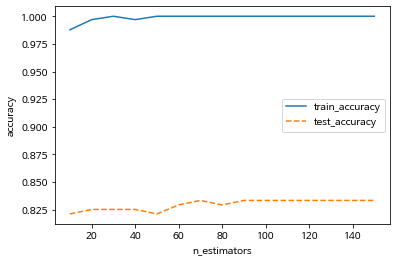

In [16]:
# 모델 설명력 그래프 확인
plt.plot(para_n_tree,train_accuracy,linestyle='-',label='train_accuracy')
plt.plot(para_n_tree,test_accuracy,linestyle='--',label='test_accuracy')
plt.ylabel('accuracy')
plt.xlabel('n_estimators')
plt.legend()

In [17]:
# train 밒 test 정확도 결과 저장용 
train_accuracy=[]; test_accuracy=[]

# n_estimators: 트리 수 변경: 1~150 
para_n_tree=[n_tree for n_tree in range(20,40)] # 참조 : para_split:[10,20,30,...,150]

for v_n_estimators in para_n_tree:
    rf=RandomForestClassifier(random_state=1234,n_estimators=v_n_estimators)
    rf.fit(df_train_x,df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    test_accuracy.append(rf.score(df_test_x,df_test_y))
    
# 데이터 테이블로 저장 
df_accuracy_n=pd.DataFrame()
df_accuracy_n['n_estimators']=para_n_tree
df_accuracy_n['TrainAccuracy']=train_accuracy
df_accuracy_n['TestAccuracy']=test_accuracy

# 모델 정확도 확인 
df_accuracy_n.round(3)

,n_estimators,TrainAccuracy,TestAccuracy
0,20,0.997,0.825
1,21,0.997,0.817
2,22,0.994,0.833
3,23,0.997,0.821
4,24,0.997,0.829
5,25,1.000,0.825
6,26,1.000,0.825
7,27,1.000,0.817
8,28,0.997,0.825
9,29,1.000,0.821


### 2-4 모델 파라미터 조정 : 트리수 변경에 따른 모델 oob error 변화

In [18]:
# error 저장 리스트 
oob_error=[]

for v_n_estimator in range(1,151):
    rf=RandomForestClassifier(n_estimators=v_n_estimator, oob_score=True, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    oob_error.append(1-rf.oob_score_)

/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:544: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:544: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:540: UserWarning: Some inputs do not have OOB scores. This prob

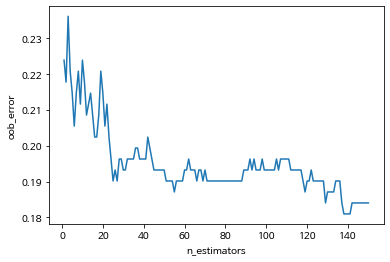

In [19]:
# 그래프로 표현
plt.plot(range(1,151), oob_error)
plt.ylabel("oob_error")
plt.xlabel("n_estimators")
# 트리 수 지정 
n_estimators=27

### 2-5 모델 파라미터 조정 : 최대 깊이 변경에 따른 모델 성능 

In [32]:
# train 밒 test 정확도 결과 저장용 
train_accuracy=[]; test_accuracy=[]

# max_depth: 최대 깊이 변경
para_depth=[depth for depth in range(1,11)] # 참조 : para_depth:[1,2,3,...,10]

for v_max_depth in para_depth:
    rf=RandomForestClassifier(random_state=1234,n_estimators=22, max_depth=v_max_depth)
    rf.fit(df_train_x,df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    test_accuracy.append(rf.score(df_test_x,df_test_y))
    
# 데이터 테이블로 저장 
df_accuracy_depth=pd.DataFrame()
df_accuracy_depth['Depthdepth']= para_depth
df_accuracy_depth['TrainAccuracy']=train_accuracy
df_accuracy_depth['TestAccuracy']=test_accuracy

# 모델 정확도 확인 
df_accuracy_depth.round(3)

,Depthdepth,TrainAccuracy,TestAccuracy
0,1,0.822,0.837
1,2,0.822,0.837
2,3,0.825,0.837
3,4,0.844,0.833
4,5,0.868,0.829
5,6,0.890,0.837
6,7,0.908,0.833
7,8,0.929,0.829
8,9,0.966,0.817
9,10,0.972,0.829


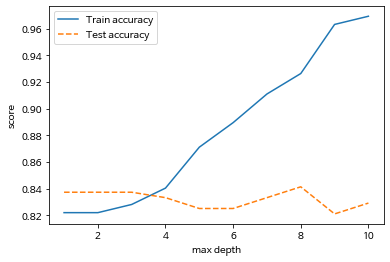

In [21]:
# 모델 설명력 그래프 확인
plt.plot(para_depth,train_accuracy,linestyle='-',label='Train accuracy')
plt.plot(para_depth,test_accuracy,linestyle='--',label='Test accuracy')
plt.ylabel('score')
plt.xlabel('max depth')
plt.legend()

### 2-5 모델 파라미터 조정 : 분리 노드의 최소 자료 수 변경에 따른 모델 성능 

In [33]:
# train 밒 test 정확도 결과 저장용 
train_accuracy=[]; test_accuracy=[]

# min_samples_split : 분할하기 위한 노드의 최소 샘플 수 
para_split=[n_split*10 for n_split in range(1,11)] # 참조 : para_split:[1,2,3,...,10]

for v_min_samples_split in para_split:
    rf=RandomForestClassifier(random_state=1234,n_estimators=22, max_depth=6 \
                              ,min_samples_split=v_min_samples_split)
    rf.fit(df_train_x,df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    test_accuracy.append(rf.score(df_test_x,df_test_y))
    
# 데이터 테이블로 저장 
df_accuracy_depth=pd.DataFrame()
df_accuracy_depth['MinSamplesSplit']= para_depth
df_accuracy_depth['TrainAccuracy']=train_accuracy
df_accuracy_depth['TestAccuracy']=test_accuracy

# 모델 정확도 확인 
df_accuracy_depth.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,1,0.862,0.833
1,2,0.831,0.837
2,3,0.825,0.837
3,4,0.828,0.837
4,5,0.825,0.837
5,6,0.825,0.837
6,7,0.825,0.837
7,8,0.822,0.837
8,9,0.822,0.837
9,10,0.822,0.837


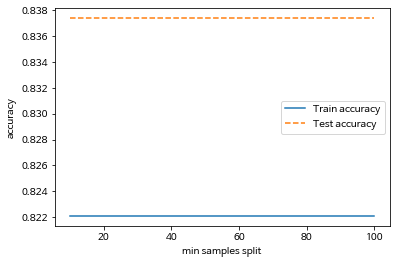

In [23]:
# 모델 설명력 그래프 확인
plt.plot(para_split,train_accuracy,linestyle='-',label='Train accuracy')
plt.plot(para_split,test_accuracy,linestyle='--',label='Test accuracy')
plt.ylabel('accuracy')
plt.xlabel('min samples split')
plt.legend()

### 2-5 모델 파라미터 조정 : 잎사귀 노드의 최소 자료 수 변경에 따른 모델 성능

In [34]:
# train 밒 test 정확도 결과 저장용 
train_accuracy=[]; test_accuracy=[]

# min_samples_split : 분할하기 위한 노드의 최소 샘플 수 
para_leaf=[n_leaf*10 for n_leaf in range(1,11)] # 참조 : para_leaf:[1,2,3,...,10]

for v_min_samples_leaf in para_leaf:
    rf=RandomForestClassifier(random_state=1234,n_estimators=22, max_depth=6\
                              ,min_samples_leaf=v_min_samples_leaf)
    rf.fit(df_train_x,df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    test_accuracy.append(rf.score(df_test_x,df_test_y))
    
# 데이터 테이블로 저장 
df_accuracy_depth=pd.DataFrame()
df_accuracy_depth['MinSamplesLeaf']= para_depth
df_accuracy_depth['TrainAccuracy']=train_accuracy
df_accuracy_depth['TestAccuracy']=test_accuracy

# 모델 정확도 확인 
df_accuracy_depth.round(3)

,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,1,0.822,0.837
1,2,0.822,0.837
2,3,0.822,0.837
3,4,0.822,0.837
4,5,0.822,0.837
5,6,0.822,0.837
6,7,0.822,0.837
7,8,0.822,0.837
8,9,0.822,0.837
9,10,0.822,0.837


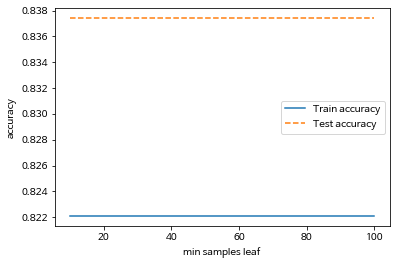

In [35]:
# 모델 설명력 그래프 확인
plt.plot(para_leaf,train_accuracy,linestyle='-',label='Train accuracy')
plt.plot(para_leaf,test_accuracy,linestyle='--',label='Test accuracy')
plt.ylabel('accuracy')
plt.xlabel('min samples leaf')
plt.legend()

### 2-5 모델 파라미터 조정 : GirdSearchCV를 이용한 최적 parameter 찾기

In [36]:
# 모듈 추가 : 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

In [27]:
estimator=RandomForestClassifier(random_state=1234,n_estimators=70)

# 구하고자 하는 parameter와 범위
param_grid={'max_depth':para_depth,'min_samples_leaf':para_leaf}

# 설명력이 높은 최적 parameter 찾기
grid_rf=GridSearchCV(estimator,param_grid,scoring='accuracy',n_jobs=-1)
grid_rf.fit(df_test_x,df_test_y)

print('best estimator model:\n{}'.format(grid_rf.best_estimator_))
print('\nbest parameter:\n{}'.format(grid_rf.best_params_))
print('\nbest score:\n{}'.format(grid_rf.best_score_.round(3)))

best estimator model:
RandomForestClassifier(max_depth=1, min_samples_leaf=10, n_estimators=70,
                       random_state=1234)

best parameter:
{'max_depth': 1, 'min_samples_leaf': 10}

best score:
0.837


# 3. 결론 도출

### 3-1 최종 모델 선택

In [37]:
# 최종 모델 
rf_final=RandomForestClassifier(random_state=1234,n_estimators=22, max_depth=6)
rf_final.fit(df_train_x,df_train_y)

# 평가 
y_pred=rf_final.predict(df_test_x)

# Train 데이터 설명력 
print("Accuracy on training set:{:.3f}".format(rf_final.score(df_train_x,df_train_y)))

# Test 데이터 설명력 
print("Accuracy on test set:{:.3f}".format(rf_final.score(df_test_x,df_test_y)))

# Confusion matrix
print("Confusion matrix:\n{}".format(confusion_matrix(df_test_y,y_pred)))


Accuracy on training set:0.890
Accuracy on test set:0.837
Confusion matrix:
[[205   1]
 [ 39   1]]


### 3-2 feature_importances_ : 설명 중요도 

In [38]:
# 변수명
v_feature_name=df_train_x.columns

# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance=pd.DataFrame()
df_importance['Feature']=v_feature_name
df_importance['Importance']=rf_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values('Importance',ascending=False,inplace=True)
df_importance.round(3)
df_importacne_1=df_importance[0:6]

<ipython-input-39-fc5b5a181af6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_importacne_1.sort_values('Importance',ascending=True,inplace=True)


Text(0, 0.5, '변수')

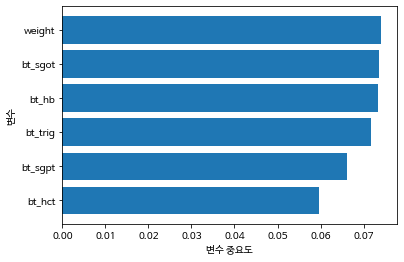

In [39]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
df_importacne_1.sort_values('Importance',ascending=True,inplace=True)
coordinates=range(len(df_importacne_1))
plt.barh(y=coordinates,width=df_importacne_1['Importance'])
plt.yticks(coordinates,df_importacne_1['Feature'])
plt.xlabel('변수 중요도')
plt.ylabel('변수')